In [3]:
#import dataset from local storge
import pandas as pd 
import numpy as np
import seaborn as sns
cd= pd.read_csv("E:\Python Projects\EDA\car data.csv")
cd

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
cd.describe                #Gives column name,mean, std , 25%, 50%, 75% and 100%
cd.shape                   # Row X Column
cd.size                    # Total = Column X Row 

2709

In [5]:
# Check missing value
cd.isnull   # Shoiw indivial row 
cd.isnull().sum() # Gives total number of missing values in table


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
#Check unique value from each row

for column in cd.columns:
    print(column, ":", cd[column].nunique())

Car_Name : 98
Year : 16
Selling_Price : 156
Present_Price : 147
Kms_Driven : 206
Fuel_Type : 3
Seller_Type : 2
Transmission : 2
Owner : 3


In [7]:
#Correlation in dataset
cd.select_dtypes(include='number').corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


In [8]:
[cd.columns]

[Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
        'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
       dtype='object')]

In [9]:
cat_data = [column for column in cd.columns if cd[column].dtypes in ['object', 'category']]
cat_data

['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']

In [10]:
num_data= [column for column in cd.columns if cd[column].dtypes in['int64', 'float64']]
num_data

['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']

# Univarient Analysis


## Catagorical datadatype

<Axes: xlabel='count', ylabel='Car_Name'>

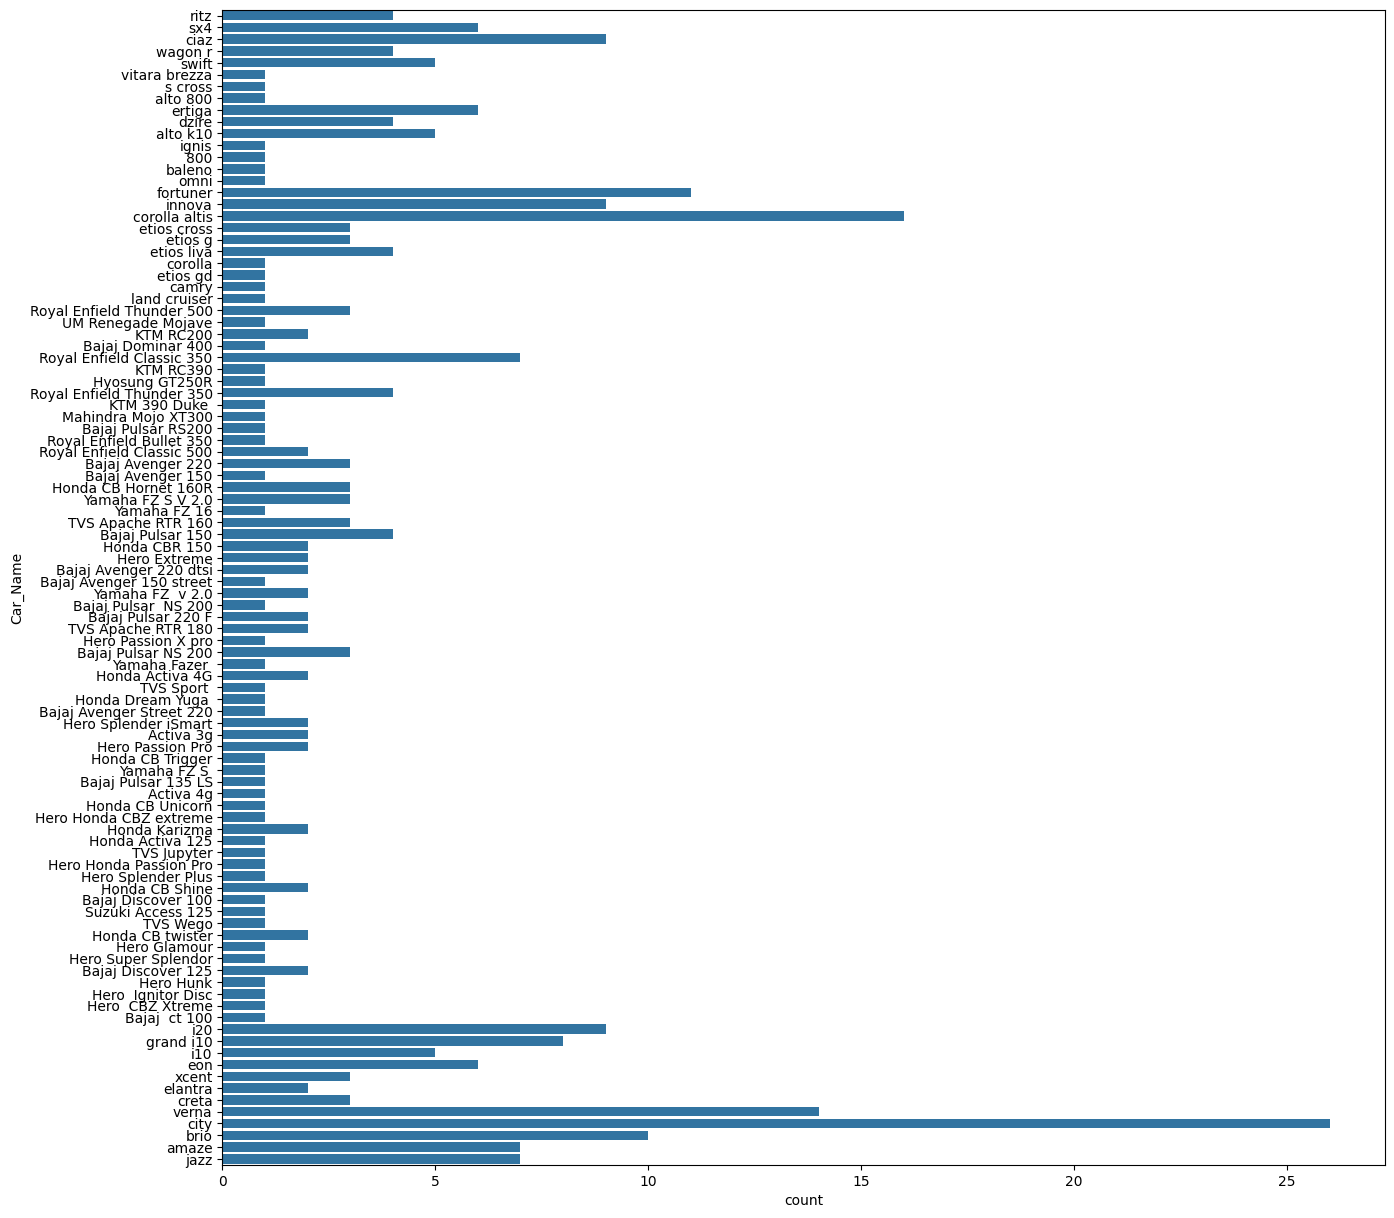

In [11]:
#Countn plot

import matplotlib.pyplot as plt
plt.figure(figsize= (15 , 15))
sns.countplot(y= cd['Car_Name'])



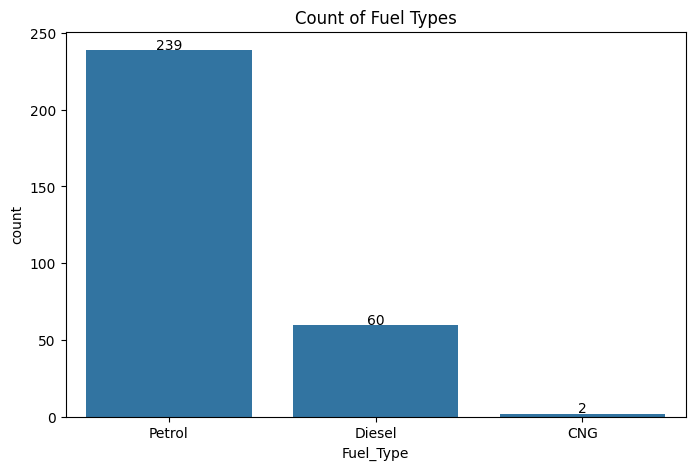

In [12]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x="Fuel_Type", data=cd)

#Code from GPT to print count number on bars of count plot
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, height + 0.5,   # position
            int(height), ha="center")                   # value

plt.title("Count of Fuel Types")
plt.show()

<Axes: ylabel='count'>

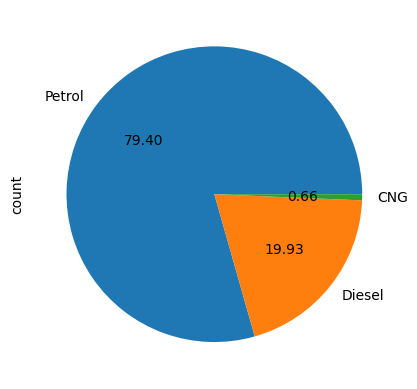

In [13]:
cd["Fuel_Type"].value_counts().plot(kind="pie",autopct='%.2f')

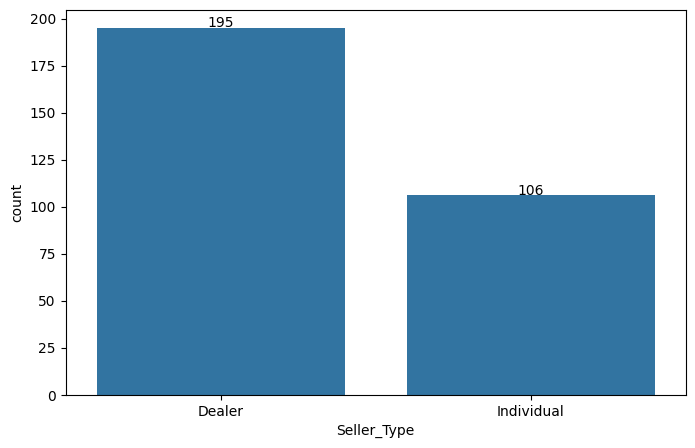

In [14]:
#Code from GPT to print number on bars of count plot
plt.figure(figsize=(8,5))
ax = sns.countplot(x=cd["Seller_Type"], data=cd)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, height + 0.5,   # position
            int(height), ha="center")                   # value

<Axes: ylabel='count'>

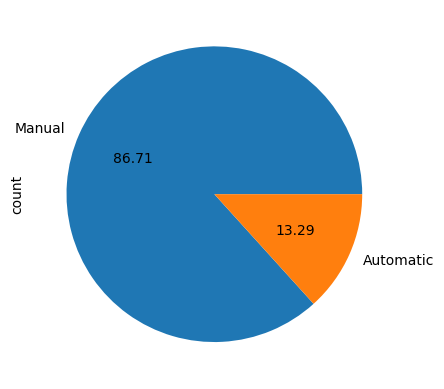

In [15]:
cd['Transmission'].value_counts().plot(kind="pie",autopct='%.2f')

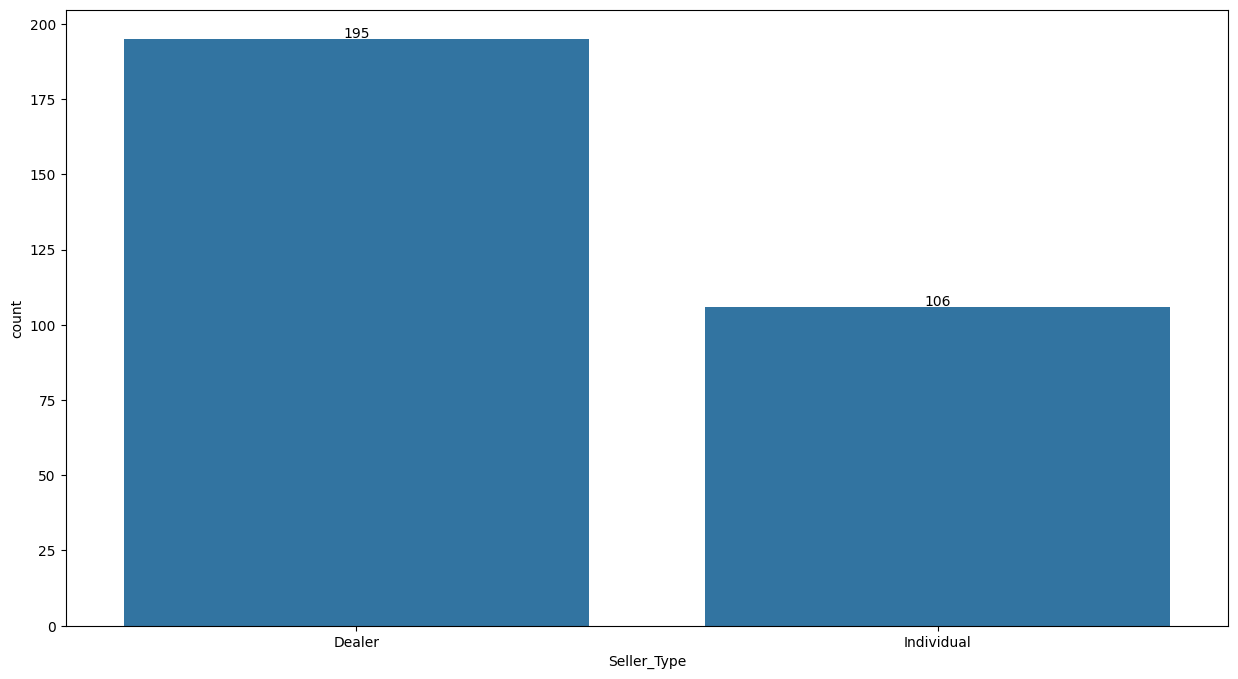

In [16]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x="Seller_Type", data=cd)

for p in ax.patches:
    height = p.get_height()  # <-- call the method!
    ax.text(p.get_x() + p.get_width()/2, height + 0.5, int(height), ha="center")

plt.show()

## Numerical Data

In [17]:
num_data

['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']

<Axes: xlabel='Kms_Driven', ylabel='Count'>

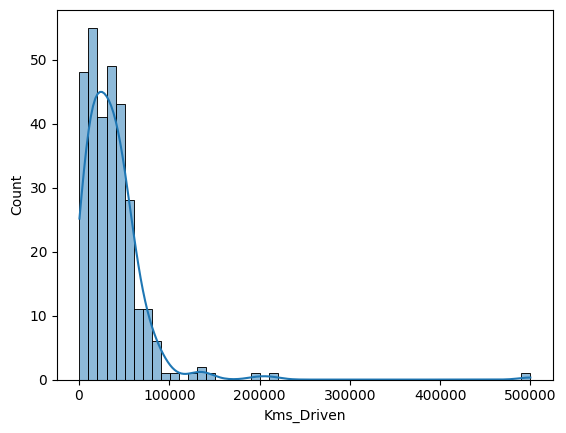

In [18]:
sns.histplot(cd['Kms_Driven'],kde=True)

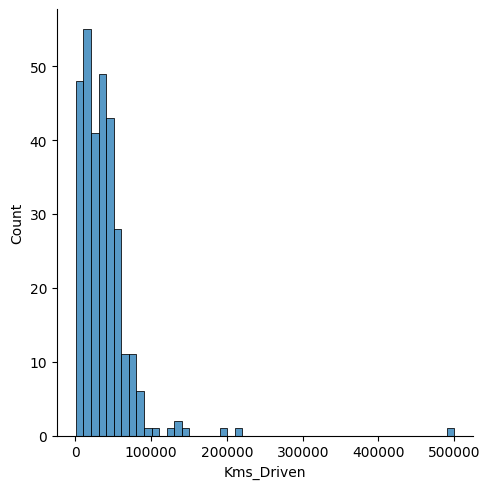

In [19]:
sns.displot(cd["Kms_Driven"])

In [20]:
q1 = cd["Kms_Driven"].quantile(0.25)
q2 = cd["Kms_Driven"].quantile(0.50)
q3 = cd["Kms_Driven"].quantile(0.75)
iqr = q3 - q1
Upper_fence = q3 + 1.5 * iqr
Lower_fence = q1 - 1.5* iqr

if Lower_fence > 0:
    Lower_fence = Lower_fence
else:
    Lower_fence = 0


print(f"Upper_fence is : {Upper_fence}")
print(f"Lower_fence is : {Lower_fence}")

Upper_fence is : 99417.5
Lower_fence is : 0


<Axes: xlabel='Kms_Driven'>

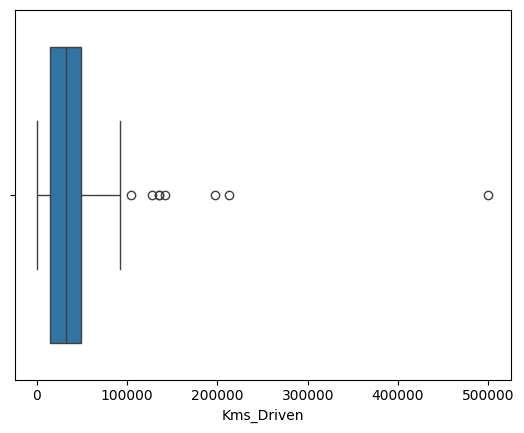

In [21]:
# Box plot
sns.boxplot(x= cd["Kms_Driven"])

In [22]:
# Show skewness 
skew = cd["Kms_Driven"].skew()*100  # 643.60 show data is strongly right skewed 
skew

643.6012679752193

In [23]:
normal = 1-skew
normal

-642.6012679752193

<Axes: xlabel='Year', ylabel='Count'>

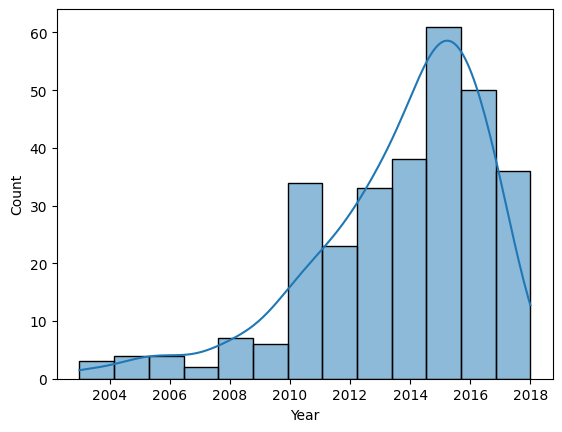

In [24]:
# Histogram of year
sns.histplot(cd["Year"],kde=True)

In [25]:
skew2= cd["Year"].skew()
skew2

-1.2461891109538386

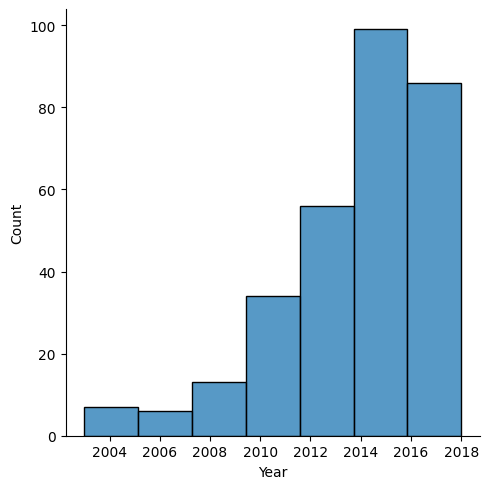

In [26]:
sns.displot( cd["Year"],bins=7)

<Axes: xlabel='Year'>

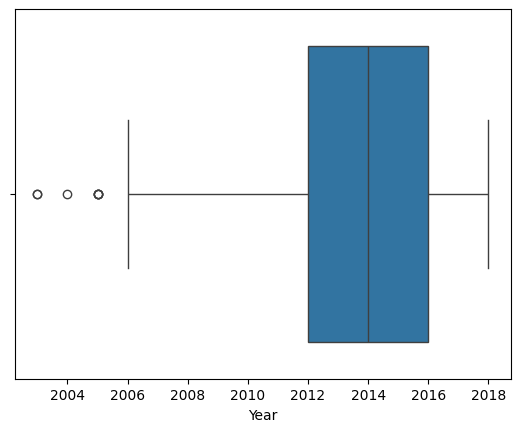

In [27]:
sns.boxplot( x= cd["Year"])

# Bivarient analysis and Multivarient analysis

<Axes: xlabel='Seller_Type', ylabel='Car_Name'>

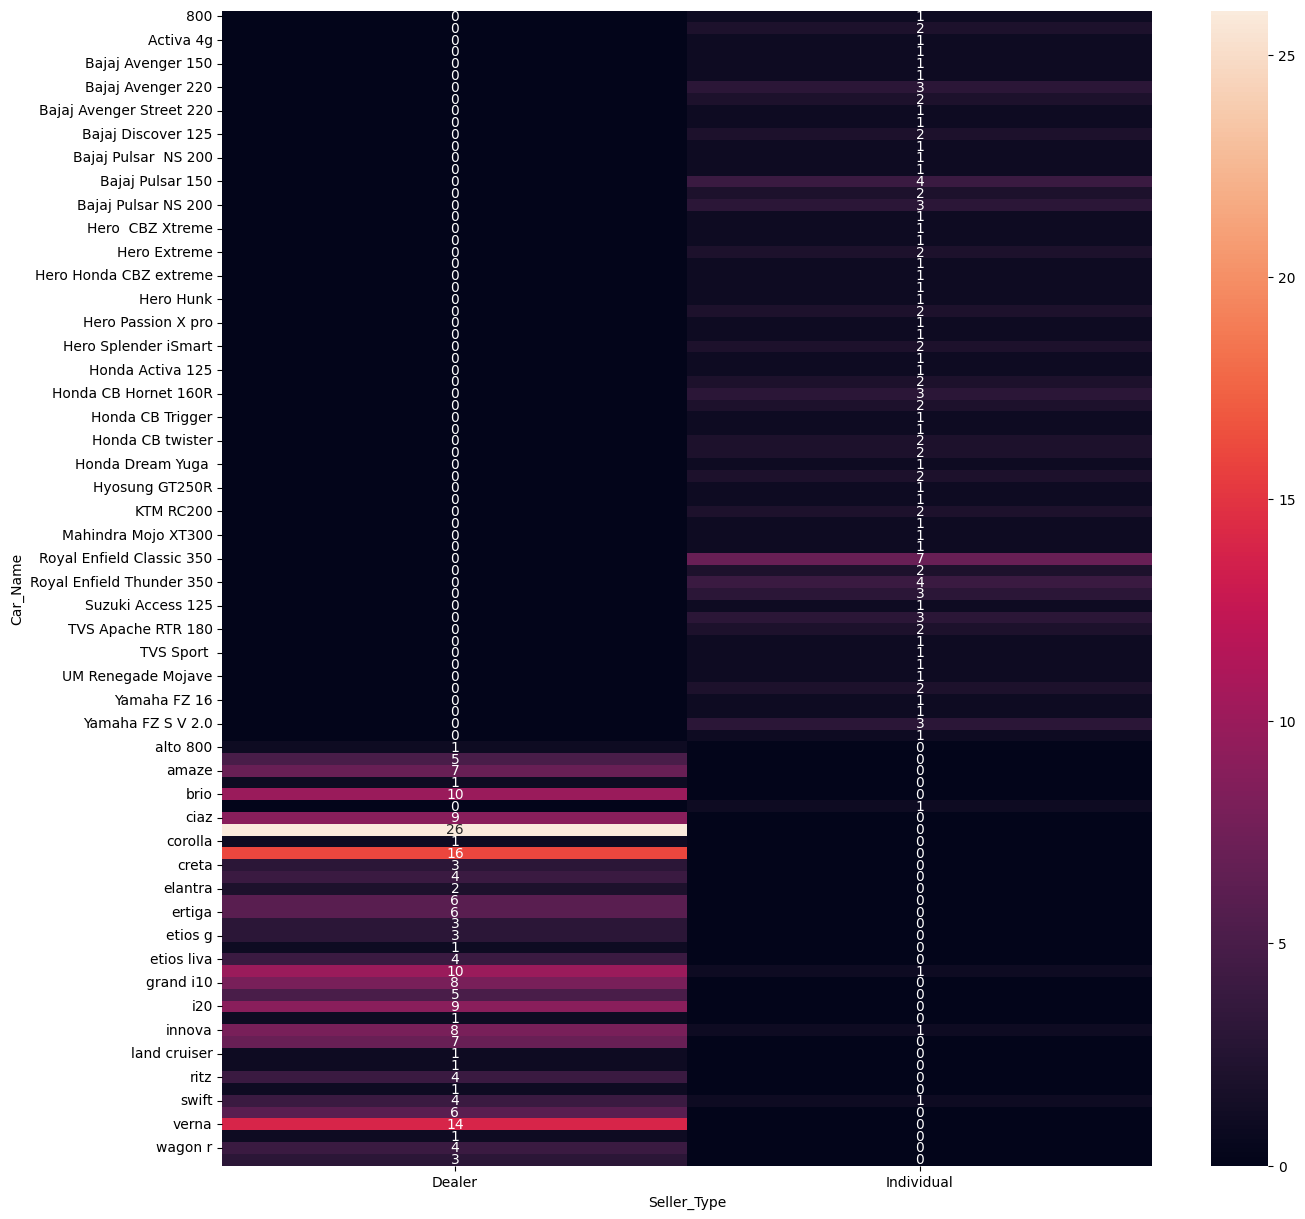

In [28]:
#Heatmap
plt.figure(figsize=(15,15))
cross_tab = pd.crosstab(cd["Car_Name"],cd["Seller_Type"])
sns.heatmap(cross_tab,annot=True)

<Axes: xlabel='Year', ylabel='Selling_Price'>

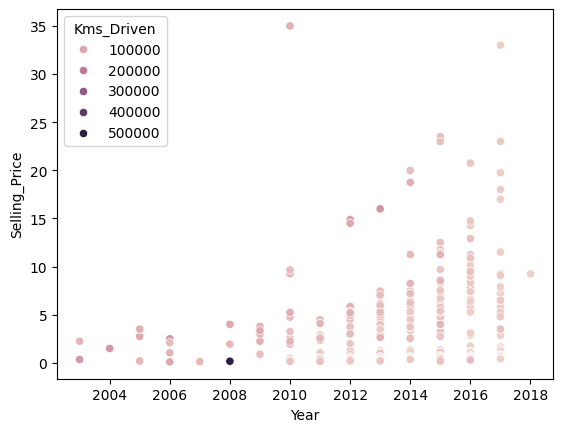

In [ ]:
# Bivarient analysis

sns.scatterplot(x= cd["Year"], y= cd["Selling_Price"])

<Axes: xlabel='Year', ylabel='Selling_Price'>

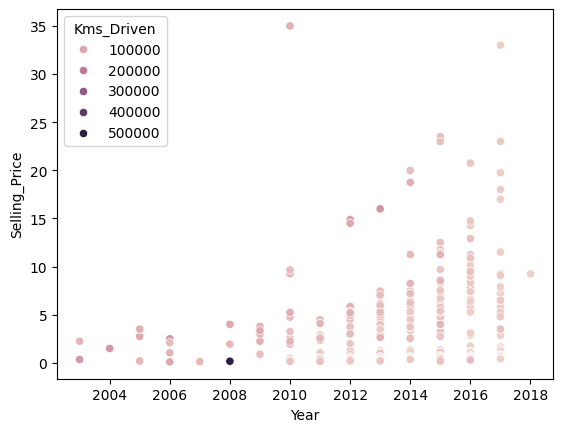

In [ ]:
#Multi varient analysis
sns.scatterplot(x= cd["Year"], y= cd["Selling_Price"],hue=cd["Kms_Driven"])

<Axes: xlabel='Kms_Driven', ylabel='Selling_Price'>

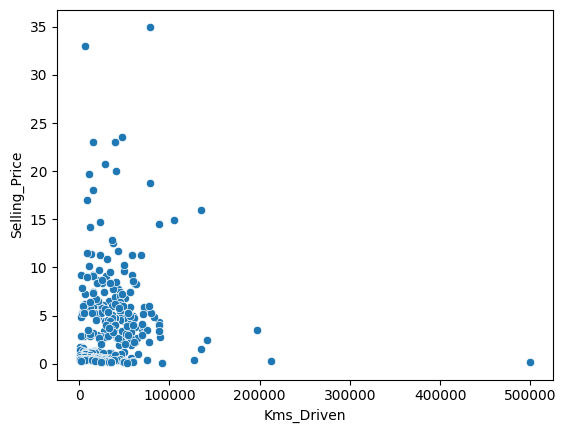

In [ ]:
# Bivarient analysis
sns.scatterplot(x=cd["Kms_Driven"],y=cd["Selling_Price"])

<Axes: xlabel='Kms_Driven', ylabel='Selling_Price'>

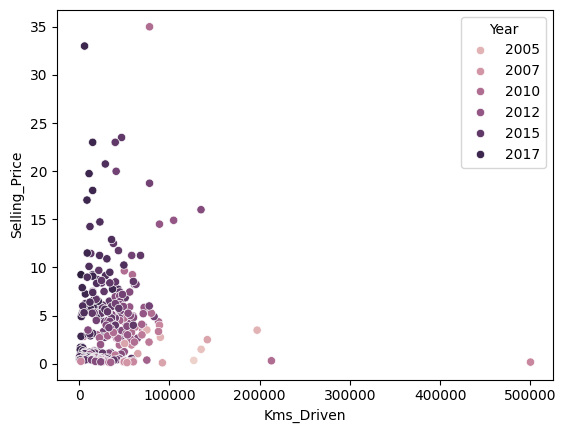

In [ ]:
# Bivarient analysis
sns.scatterplot(x=cd["Kms_Driven"],y=cd["Selling_Price"],hue=cd["Year"])

In [41]:
print(num_data)
print(cat_data)

['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']
['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']


<Axes: xlabel='Selling_Price', ylabel='Seller_Type'>

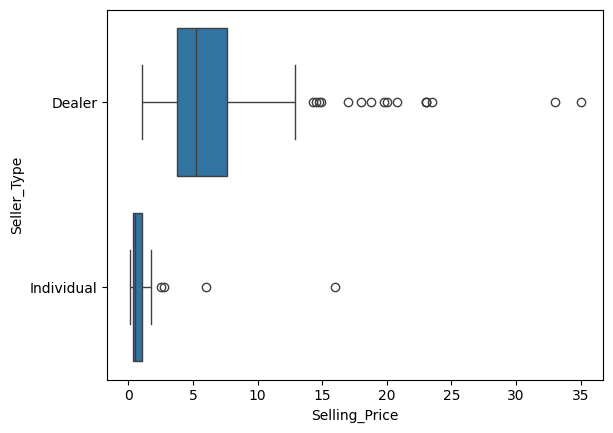

In [43]:
# Box plot
sns.boxplot(x=cd["Selling_Price"],y= cd["Seller_Type"])

In [44]:
titanic = pd.read_csv("E:\Python Projects\EDA\Titanic-Dataset.csv")

In [48]:
cat_feature=[column for column in titanic.columns if titanic[column].dtype=="O"]
cat_feature

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [50]:
num_feature = [column for column in titanic.columns if titanic[column].dtype!="0"]
num_feature

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

<Axes: xlabel='Sex', ylabel='Age'>

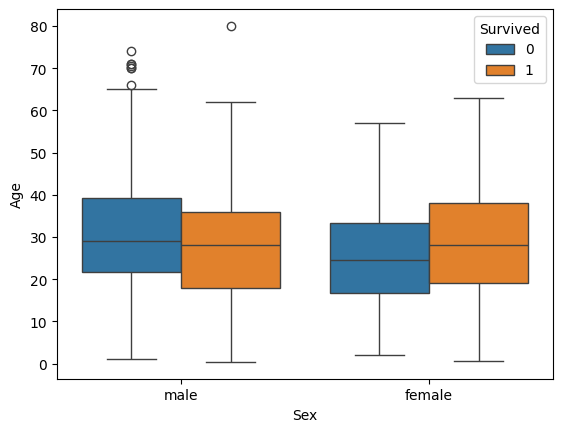

In [53]:
sns.boxplot(x=titanic["Sex"],y=titanic["Age"],hue=titanic["Survived"])